<h1>Deep Learning</h1>
<li>Rough idea: mimic the human brain (not that we know how that works!)
<li>Neural networks: learn through examples with no procedural learning algorithm
<li>As wikipedia says: <span style="color:blue">vaguely</span> inspired by animal brains

<h2>Structure of neural networks</h2>
<li>A neural network is a directed acyclic graph
<li><span style="color:red">Neurons</span>: nodes
<li><span style="color:red">Synapses</span>: connections (edges) between nodes that contain weights
<li>a neuron calculates a weighted sum of its input nodes and then decides whether to fire or not (should it react to the input or not)
<li><span style="color:red">Activation functions</span>: the function that makes the activation decision
<li><span style="color:red">Layers</span>: aggregations of neurons that use the same transformation function (different layers can use different functions)
<li><span style="color:red">Input layer</span>: feature values from example cases enter the network here (think of it as the sensory organ of the network)
<li><span style="color:red">Output layer</span>: the result (action) layer (classes, continuous values)
<li><span style="color:red">Hidden layer</span>: all the layers between the input and output layers

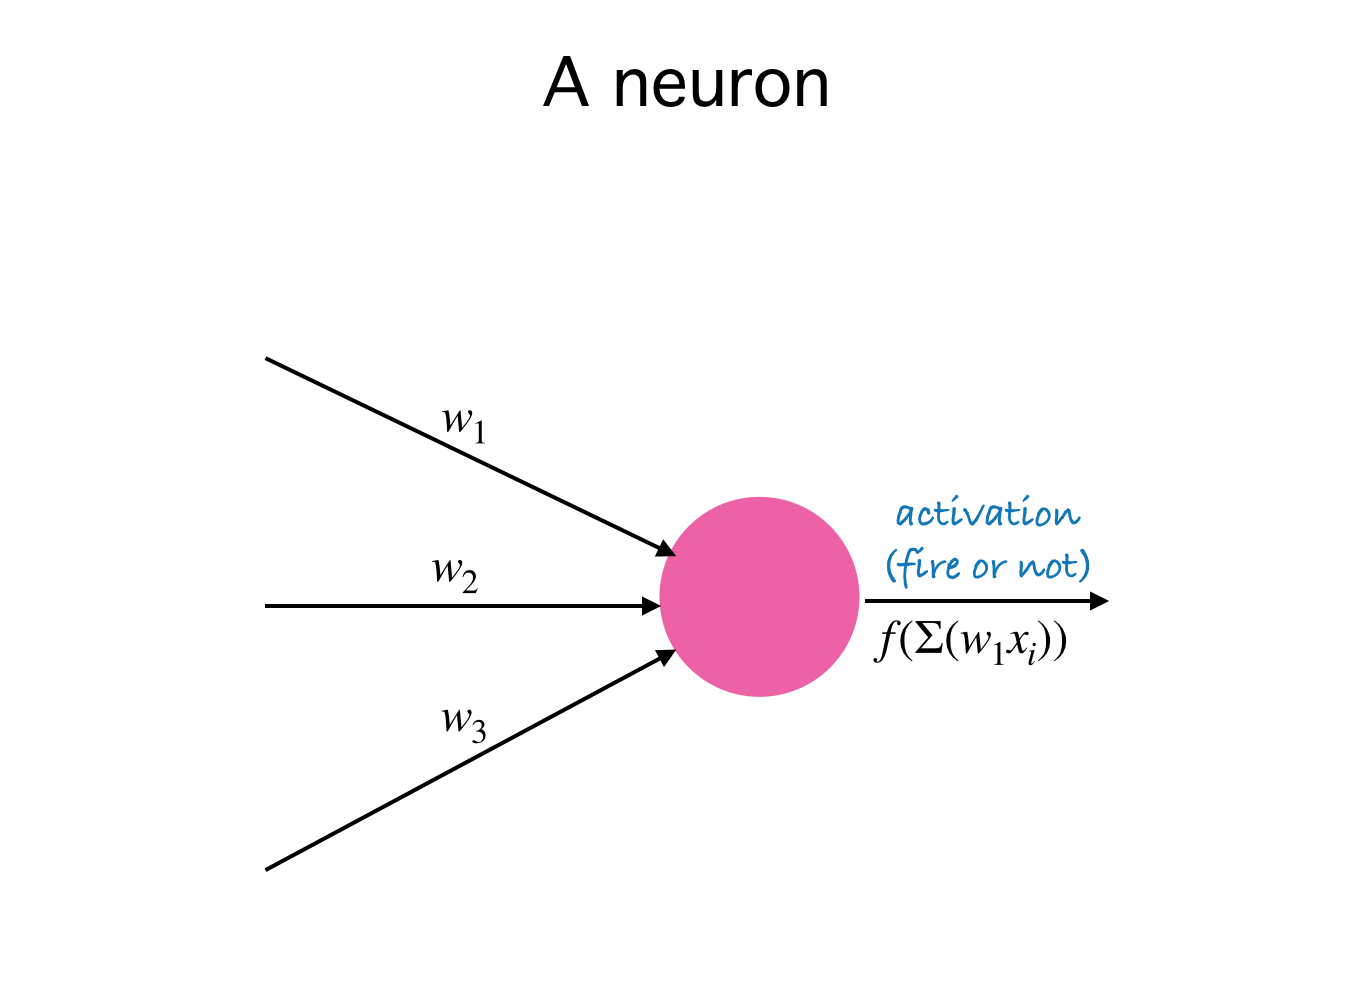

In [1]:
from IPython.display import Image
Image(filename="neuron.png",height=500,width=500)

<h2>Example of a network</h2>
<small>from: <i>https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg</i></small>

In [2]:
from IPython.display import Image
Image(url="https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg")

<h2>Rough procedure: "for dummies"!</h2>
<li>INITIALIZE: randomly assign weights to each connection
<li>RUN:
<ol>
<li>give an example to the network
<li>calculate the weighted sum of inputs at each neuron
<li>apply the activation function to each weighted sum
<li>do this layer by layer until you get the output layer values
<li>calculate the difference between calculated values and actual values
<li>tweak weights in the entire network so that the calculate output gets "marginally" closer to the actual value
<li>rinse and repeat

<h1>A super simple example</h1>
<li>Each input case has 3 features, each of which is either a 0 or a 1
<li>Classify inputs into either class 0 or class 1
<li>We know that if feature 1 is 0, then the class is 0 and if feature 1 is 1, the class is 1
<li>We want the net to learn this

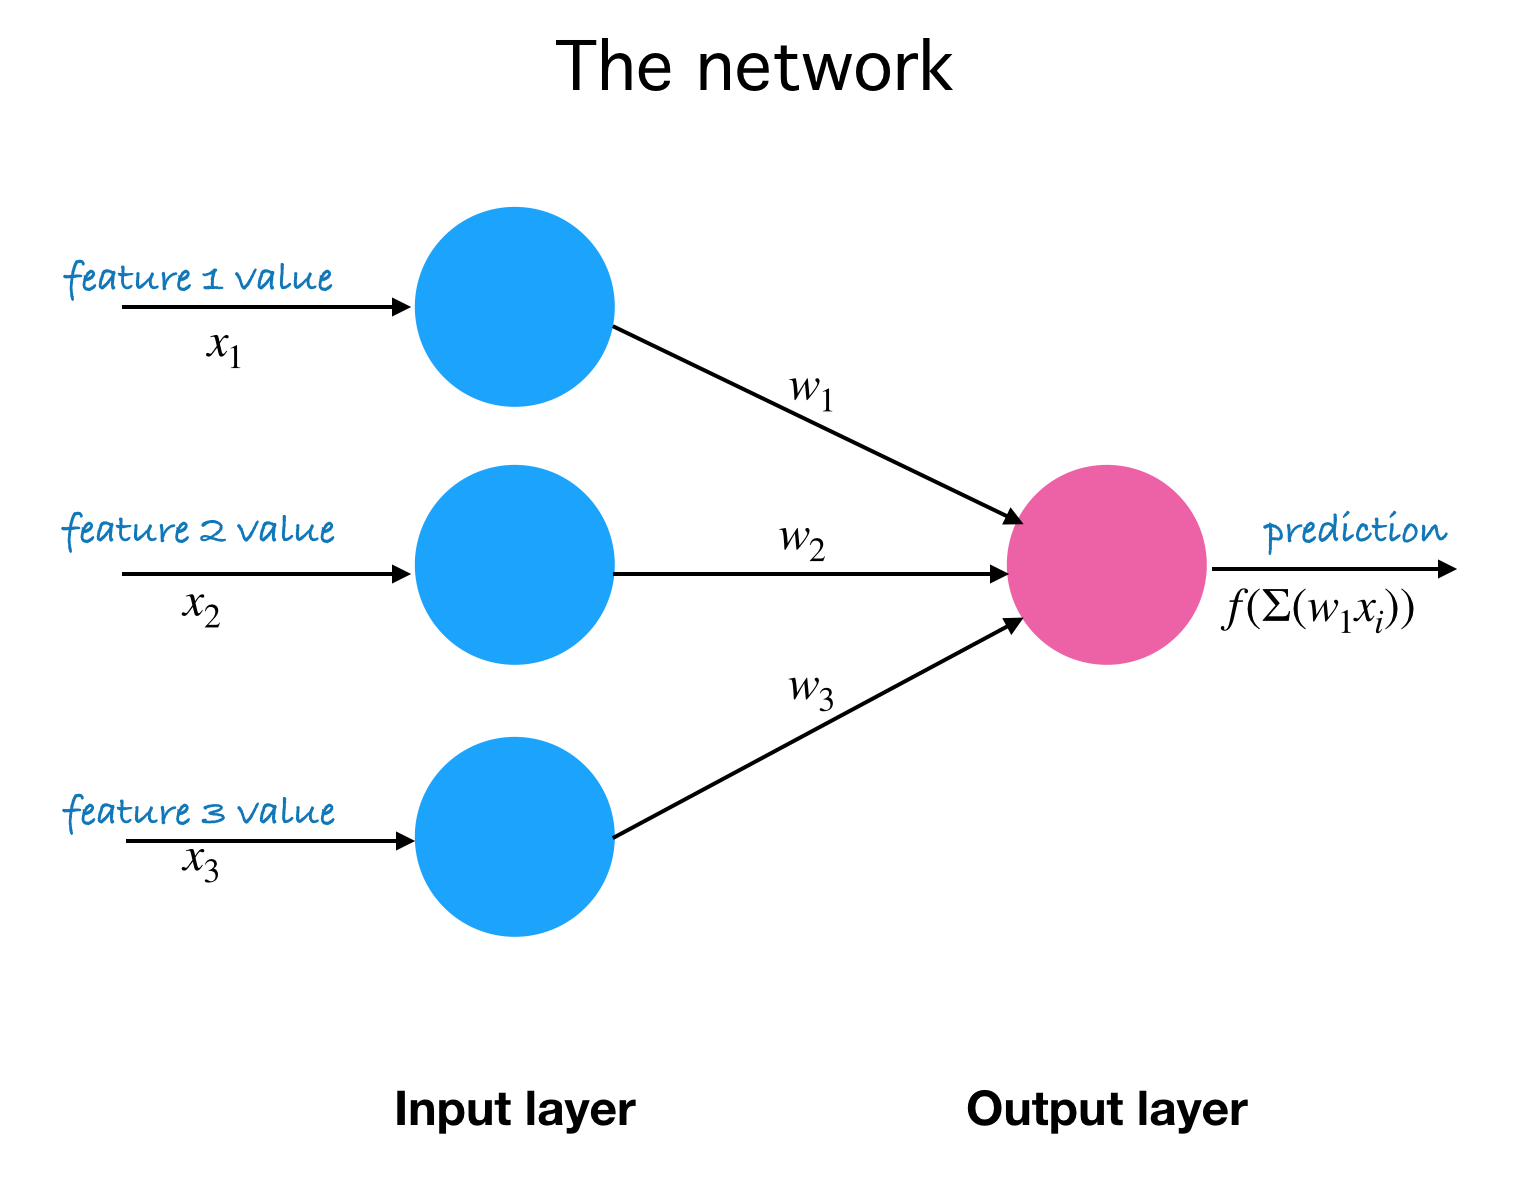

In [3]:
Image(filename="simple_network.png",height=500,width=500)

In the figure above, there is no hidden layer. This is the simplest type of neural network.

Note, neural networks have to have an input layer and an output layer. The simplest network is one with just an input and output layer, and no other layers.

<h3>Define inputs and outputs</h3>

In [4]:
import numpy as np 
#Rick and Ilsa will always have Paris
#but, we'll always have numpy 

In [5]:
# Here, we have four observations/examples, where each row is an observation/example.

X = np.array([  [0,0,1],      # x11=0, x21=0, x31=1
                [0,1,1],      # x12=0, x22=1, x32=1
                [1,0,1],      # x13=1, x23=0, x33=1
                [1,1,1] ])    # x14=1, x24=1, x34=1
y = np.array([[0,0,1,1]]).T   # y1=0, y2=0, y3=1, y4=1

Note in this example, that $y$ depends only on $x_1$. Indeed, when $x_1 = 0$, $y_1=0$ regardless of what $x_2$ and $x_3$ are, as demonstrated by the first two observations/examples (first two rows). When $x_1 = 1$, $y_1=1$, regardless of what $x_2$ and $x_3$ are, as demonstrated by the last two observations.

Therefore, we want this network to learn the relationship $y=x_1$, which is a linear relationship.

<h3>Initialization</h3>
<li>generate random weights for every edge in the network
<li>we'll use np.random.random (generates random numbers between 0 and 1)
<li>and adjust the weights so that they are between -1 and 1

In [6]:
np.random.seed(2)
syn0 = 2*np.random.random((3,1)) - 1   # syn0 is the array for the weights which as shape (3,)
                                       # np.random.random((3,1)) generates values from N(0,1) into a (3,1) array.
                                       # 2*np.random.random((3,1)) - 1 generates values from N(-1,1) 
syn0

array([[-0.1280102 ],
       [-0.94814754],
       [ 0.09932496]])

<h2>Define the activation function</h2>


<li>Let's see what our weighted sums look like

In [7]:
np.dot(X,syn0)     # dot product with the weights to take the weighted sum.

array([[ 0.09932496],
       [-0.84882258],
       [-0.02868524],
       [-0.97683278]])

$X$ has shape $(4,3)$, and the weight array has shape $(3,1)$. The dot product results in an array of shape $(4,1)$, which is what we want.

In [8]:
y

array([[0],
       [0],
       [1],
       [1]])

<li>Nice. We could say that anything less than 0 is a 0 and anything greater than 0 is a 1
<li>And use these "predicted" 0s and 1s to compute the error
<li>And use these errors to adjust weights
<li>Not ideal, because:
<ul>
<li>learning would be binary and the model would keep switching from class 0 to class 1 
<li>what we would like is for learning to be smooth
<li>"hmm, looks like a class 1 but i'll just tweak the probability that it is a class 1 rather than switch entirely to a class 1"
<li>"that way, over time, I'll get more and more sure"

<h2>Sigmoid function</h2>
<small>https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg</small>


In [9]:
Image(url="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg")


<li>We don't want to change weights linearly
<li>When we're more confident of a weight, we want to change it less
<li>When we're less confident of a weight, we want to change it more
<li>Sigmoid functions exhibit this property
<li>And return values between 0 and 1 
<li>Anything .5 or greater is a 1
<li>Anything less than .5 is a 0
<li>Or, for complex classification problems, we could figure out the right threshold value just like we did with regression

Benefits of the sigmoid function: 
<li> For any $x \in (-\infty, \infty)$, the sigmoid function, $f$, returns $f(x) \in (0,1)$. That is, it reduces value on the reals to between 0 and 1.
<li> When you're far way from where you need to be, the slope is large. When you're close to where you need to be, the slope is small.

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
print(sigmoid(.9) - sigmoid(.85))
print(sigmoid(.3) - sigmoid(.25))
print(sigmoid(.05) - sigmoid(0))
print(sigmoid(2)-sigmoid(1.9))
print(sigmoid(3)-sigmoid(2.9))
print(sigmoid(6)-sigmoid(5.9))

0.010382360151031
0.012266015925860962
0.012497396484210332
0.010905552340880198
0.00472768990085104
0.00025933760637630865


Notice that the difference gets smaller and smaller, illustrating that the curve is flattening out as x increases (or decreases).

<h2>Now let's train the network</h2>
<li>First we'll multiply X by the weight array
<li>The linear combination we talked about
<li>Then apply the sigmoid function to introduce nonlinearity and convert the total to a (0,1) range
<li>level_0: First (input layer)
<li>level_1: Second (hidden layer - output layer in our case)
<li>Then compute the error (y - level_1)
<li>Finally adjust the weights
<ul>
<li>The sigmoid function gives us the rate at which we want to move the weights
<li>multiply the error by the slope (derivative) at that point
<li>the slope at point x is d/dx sigmoid(x) = sigmoid(x)*(1-sigmoid(x))
<li>notice that the slope is lower at the extremes and higher in the middle!
<li>Use these deltas to adjust the weights
</ul>
<li>Repeat with the next set of training cases

In [11]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)   # assumes x is sigmoid(x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):    # sigmoid is the default activation
    # passes denotes the number of back propagation iterations/steps (10 is the default)
    np.random.seed(1)
    syn0 = 2*np.random.random((3,1)) - 1    # initialize the weights
    for i in range(0,passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0))
        level_1_error = y - level_1 #error
        level_1_delta = level_1_error * activation_function(level_1,True)  # how much you want to adjust the weights in the next pass
        syn0 += np.dot(level_0.T,level_1_delta)  # updating the weights by adding the dot product of X and level_1_delta
    return syn0

# level_0 has shape (4,3) and level_1_delta has shape (4,1), so we have to take the transpose of level_0 in order to 
# take the dot product of the two.

$\texttt{level_1_delta = level_1_error * activation_function}(\texttt{level_1,True}) \ $ Here, you're multiplying by the derivative of the activation function (the slope) at the prediction value. We do this to get closer to the actual value, by decreasing the error.

Note: when $\texttt{deriv=False}$, the x (input) passed to $\texttt{activation_function}$ is $z = \sum{w_ix_i}$. When $\texttt{deriv=True}$, the x passed to $\texttt{activation_function}$ is $\texttt{sigmoid}(\texttt{z})$. You're computing the derivative at the point z when $\texttt{deriv=True}$.

In [12]:
# level_1_error

In [13]:
final_weights = run_net(X,y,sigmoid,10)
final_weights

array([[ 1.72057624],
       [ 0.23669265],
       [-0.84074522]])

In [14]:
test_X = np.array([[1,1,1],[0,1,1],[1,0,0],[0,0,1]])
sigmoid(np.dot(test_X,final_weights))  # returns the final predicted output

array([[0.75334332],
       [0.35341708],
       [0.84820304],
       [0.30137786]])

Notice that the values above are not 0 or 1, but the dependent variable, $y \in \{0,1\}$. To constrain $y$ to these values, apply a threshold such that anything above the threshold is labeled with a 1 and anything below is labeled 0. For instance, let the threshold be 0.5. Then the output would be $y = [1, 0, 1, 0]$.

<h2>Walkthrough</h2>

In [15]:
syn0 = 2*np.random.random((3,1)) - 1  
level_0 = X #Input layer
level_1 = sigmoid(np.dot(level_0,syn0)) #predicted y's
level_1_error = y - level_1 #error
level_1_delta = level_1_error * sigmoid(level_1,True) #change factor
# syn0 += np.dot(level_0.T,level_1_delta) #new weights

print(level_0)
print(level_1,"\n")
print(level_1_error,"\n")
print(level_1_delta,"\n")
print(syn0,"\n")
#print(y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0.3067574 ]
 [0.17919499]
 [0.22958471]
 [0.12818018]] 

[[-0.3067574 ]
 [-0.17919499]
 [ 0.77041529]
 [ 0.87181982]] 

[[-0.0652342 ]
 [-0.02635674]
 [ 0.13626764]
 [ 0.09742588]] 

[[-0.39533485]
 [-0.70648822]
 [-0.81532281]] 



In [16]:
np.dot(level_0.T,level_1_delta)

array([[0.23369352],
       [0.07106914],
       [0.14210258]])

<h2>Great! Let's try a different input</h2>
<li>If any two  or three are 1, then the class is 1
<li>Otherwise the class is zero

In [17]:
import numpy as np
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1],
             [1,1,0],
             [0,1,0],
             [1,0,0],
             [1,0,0]])
                
y = np.array([[0],[1],[1],[1],[1],[0],[0],[0]])

final_weights = run_net(X,y,sigmoid,10000)
test_X = np.array([[1,1,1],[0,1,1],[1,0,0],[0,0,1]])
sigmoid(np.dot(test_X,final_weights))  ## computes the output/prediction, y_hat, at that node

array([[0.78652135],
       [0.82954761],
       [0.43086044],
       [0.68809156]])

Using a threshold of 0.5, the output is then $\hat{y} = (1,1,0,1)$, which is not what we expected. We wanted our model to learn the following relationship: if at least two inputs are equal to 1, then the dependent variable is 1: otherwise the dependent variable is 0. Under this expectation, the output should be $(1,1,0,0)$, but this isn't the case. No matter how many iterations the algorithm does, the model will never learn this relationship since it does not have a hidden layer. Indeed, the relationship is non-linear and so we need one or more hidden layers to model this behavior.

<h2>Terrible!</h2>

<li>The pattern here is non-linear
<li>Solution: Add another layer to the network

<h2>Three layer network</h2>
<li>Input
<li>Hidden
<li>Output
<li>We need two sets of weights 
<li>Input layer has 3 nodes
<li>Hidden layer has 4 nodes
<li>Output layer has 1 node

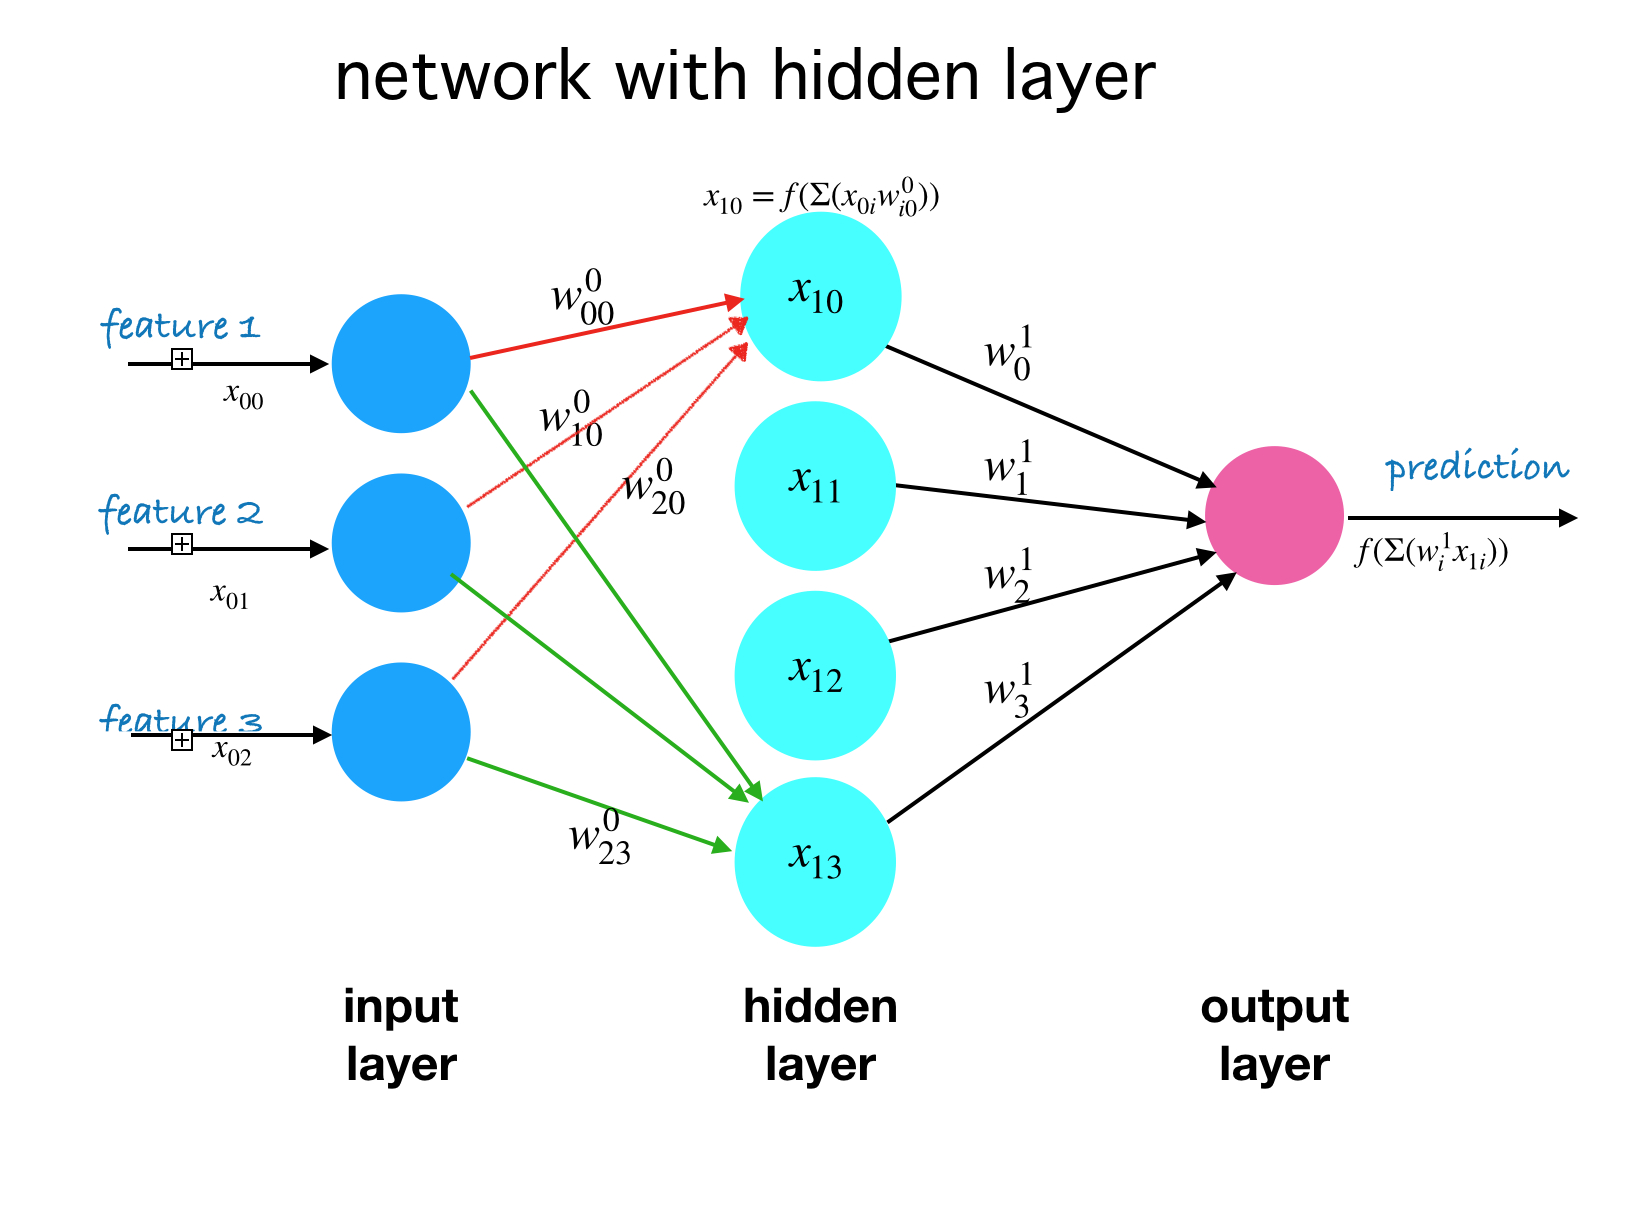

In [18]:
Image(filename="multi layer network.png",height=500,width=500)

<h2>Initialize</h2>
<li>randomly assign weights at each level

In [19]:
syn0 = 2*np.random.random((3,4)) - 1   # shape of syn0 is (3,4)
syn1 = 2*np.random.random((4,1)) - 1   # shape of syn1 is (4,1)
# notice that we now have two sets of weights because there is a hidden layer.

In [20]:
level_1

array([[0.3067574 ],
       [0.17919499],
       [0.22958471],
       [0.12818018]])

<h3>Calculate node outputs at each level</h3>

In [21]:
level_0 = X                              # level 0 is the input layer (the examples, or input data)
level_1 = sigmoid(np.dot(level_0,syn0))  # level 1 is the activation at the hidden layer  
print(level_1)                           # shape of level 1 is 8x4, or (8,4)
level_2 = sigmoid(np.dot(level_1,syn1))  # level 2 is the activation at the output layer
print(level_2)                           # shape of level 2 is 8x1, or (8,1)

[[0.59156505 0.35638354 0.68053573 0.27984616]
 [0.51538526 0.31054758 0.69717225 0.24846127]
 [0.49377636 0.21457195 0.48523231 0.1718312 ]
 [0.41732254 0.18182244 0.50463625 0.15003643]
 [0.33087873 0.28639589 0.32350963 0.31236398]
 [0.4233885  0.44856632 0.51939863 0.45968497]
 [0.40243371 0.33037528 0.3067574  0.34808226]
 [0.40243371 0.33037528 0.3067574  0.34808226]]
[[0.5053376 ]
 [0.50687089]
 [0.51655106]
 [0.51587768]
 [0.46972561]
 [0.45029194]
 [0.46710261]
 [0.46710261]]


In [22]:
# np.dot(level_0,syn0)
level_0.dot(syn0) 

array([[ 0.370439  , -0.5910955 ,  0.75623487, -0.94522481],
       [ 0.06156045, -0.79756055,  0.83386834, -1.10683578],
       [-0.02489585, -1.29758372, -0.05908794, -1.57270439],
       [-0.3337744 , -1.50404877,  0.01854553, -1.73431536],
       [-0.7042134 , -0.91295327, -0.73768934, -0.78909055],
       [-0.30887855, -0.20646505,  0.07763347, -0.16161097],
       [-0.39533485, -0.70648822, -0.81532281, -0.62747958],
       [-0.39533485, -0.70648822, -0.81532281, -0.62747958]])

<h2>Backpropagation</h2>
<li>Calculate the error between predicted values (output layer) and actual values
<li>propagate these errors back through the net, adjusting weights 


In [23]:
level_2_error = y - level_2
level_2_error

array([[-0.5053376 ],
       [ 0.49312911],
       [ 0.48344894],
       [ 0.48412232],
       [ 0.53027439],
       [-0.45029194],
       [-0.46710261],
       [-0.46710261]])

In [24]:
level_2_delta = level_2_error*sigmoid(level_2,deriv=True)

<li>Next, propagate the deltas back toward the input layer

In [25]:
level_1_error = level_2_delta.dot(syn1.T)
level_1_delta = level_1_error * sigmoid(level_1,deriv=True)

<li>Calculate the new weights

In [26]:
syn1 += level_1.T.dot(level_2_delta)
syn0 += level_0.T.dot(level_1_delta)

<h2>Putting it all together</h2>

In [27]:
def sigmoid(x,deriv=False):
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def run_net(X,y,activation_function=sigmoid,passes=10):
    import time
    np.random.seed(1)
    syn0 = 2*np.random.random((3,4)) - 1
    syn1 = 2*np.random.random((4,1)) - 1

    for i in range(passes):
        level_0 = X
        level_1 = activation_function(np.dot(level_0,syn0))
        level_2 = activation_function(np.dot(level_1,syn1))

        level_2_error = y - level_2

        level_2_delta = level_2_error*activation_function(level_2,deriv=True)

        level_1_error = level_2_delta.dot(syn1.T)  # pseudo-error term at level 1. There is no actual error though.

        level_1_delta = level_1_error * activation_function(level_1,deriv=True)

        syn1 += level_1.T.dot(level_2_delta)
        syn0 += level_0.T.dot(level_1_delta)
#     print(level_2)
    return syn0,syn1

In [28]:
syn0,syn1 = run_net(X,y,activation_function=sigmoid,passes=100)


[[0.29038182]
 [0.7597043 ]
 [0.72788203]
 [0.90378096]
 [0.73607507]
 [0.28925349]
 [0.19580023]
 [0.19580023]]


<h3>Applying the net to test cases</h3>


In [29]:
test_X

array([[1, 1, 1],
       [0, 1, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [30]:
level_0 = test_X
level_1 = sigmoid(np.dot(level_0,syn0))
level_2 = sigmoid(np.dot(level_1,syn1))
level_2

array([[0.90480965],
       [0.76030727],
       [0.19489967],
       [0.28910602]])

Notice now that $\hat{y} = [1,1,0,0]$, the desired output. A neural network with one hidden layer was able to learn the non-linear relationship.